<a href="https://colab.research.google.com/github/jashvanjara/UNSW-Datathon-2023/blob/main/Sliding_Scale_%5BSecond_Generation%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.ticker as mtick

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [ ]:

csv_path, _ = os.path.splitext("https://raw.githubusercontent.com/jashvanjara/UNSW-Datathon-2023/main/HIV-Dataset.csv")

In [ ]:
Data = pd.read_csv("https://raw.githubusercontent.com/jashvanjara/UNSW-Datathon-2023/main/HIV-Dataset.csv")

In [ ]:
data = Data.to_numpy()

In [ ]:
data.shape

(534960, 15)

In [ ]:
#search = np.array([]).reshape(int(len(data)/60) * 36, 8)

total_size = int(len(data)/60) * 36
print(total_size)

search = np.zeros((total_size, 12, 11))
demographic = np.zeros((total_size, 2))
outcome = np.zeros((total_size, 2))
#search = np.concatenate((search, [data[0:12, 0]]))

320976


In [ ]:
for patient in range(int(len(data)/60)):
    # Calculate first time stamp position
    old_pos = patient*60
    
    # Store demographic information as one-off
    demo = [data[old_pos, 3], data[old_pos, 4]]
    
    
    for month in range(60):
        # Calculate positions
        new_pos = (patient*36)+month
        old_pos = (patient*60)+month
        
        if month < 36:
            # Store demographic
            demographic[new_pos] = demo
        
            # Add new input for next 12 months
            search[new_pos, :, 0:3] = data[old_pos:old_pos+12, 0:3]
            search[new_pos, :, 3:11] = data[old_pos:old_pos+12, 5:13]
        
            # Review change in drug compared to last value of previous month
            if (data[old_pos+12, 5:10] == data[old_pos+24, 5:10]).all():
                    outcome[new_pos, 0] = 1
        
        if month > 12:
            # Review for non-adherence
            if data[old_pos, 12] == 0.0:
                outcome[new_pos-13:new_pos-1, 1] = 1

In [ ]:
search.shape

(320976, 12, 11)

In [ ]:
search = search.reshape(total_size, 12 * 11)

In [ ]:
outcome.shape

(320976, 2)

In [ ]:
dataset = np.concatenate((demographic, search, outcome), axis=1)

In [ ]:
dataset.shape

(320976, 136)

In [ ]:
df = dataset

In [ ]:
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [ ]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [ ]:
np.squeeze(train_df[:, 135:136]).shape

(224683,)

In [ ]:
col = np.array([])
for i in range(12):
    col = np.append(col, (Data.columns[0:3] + "_" + str(i)).append(Data.columns[5:13] + "_" + str(i)))

final = pd.concat([
    pd.DataFrame(demographic, columns=['Gender', 'Ethnicity']),
    pd.DataFrame(search.reshape(total_size, 12 * 11), columns = col),
    pd.DataFrame(outcome, columns=['Drug Changed', "Non Adherent"])],
    axis = 1)

In [ ]:
ds = tf.data.Dataset.from_tensor_slices(final)

In [ ]:
def get_basic_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [ ]:
target = final.pop("Drug Changed")

In [ ]:
alt_target = final.pop("Non Adherent")

In [ ]:
tf.convert_to_tensor(final)
print()

In [ ]:
final.shape

(320976, 134)

In [ ]:
numerical_cols = []
categorical_cols = [1]
bool_cols = [0]

for m in range(12):
  for i in range(11):
    if i < 3:
      numerical_cols.append(m*11 + i + 2)
    elif i < 8:
      categorical_cols.append(m*11 + i + 2)
    else:
      bool_cols.append(m*11 + i + 2)


# 5, 6, 7, 8, 9, 16, 17, 18
#final.iloc[:, six_cat_cols]

In [ ]:
 final.iloc[:, categorical_cols].columns

Index(['Ethnicity', 'Base Drug Combo_0', 'Comp. INI_0', 'Comp. NNRTI_0',
       'Extra PI_0', 'Extra pk-En_0', 'Base Drug Combo_1', 'Comp. INI_1',
       'Comp. NNRTI_1', 'Extra PI_1', 'Extra pk-En_1', 'Base Drug Combo_2',
       'Comp. INI_2', 'Comp. NNRTI_2', 'Extra PI_2', 'Extra pk-En_2',
       'Base Drug Combo_3', 'Comp. INI_3', 'Comp. NNRTI_3', 'Extra PI_3',
       'Extra pk-En_3', 'Base Drug Combo_4', 'Comp. INI_4', 'Comp. NNRTI_4',
       'Extra PI_4', 'Extra pk-En_4', 'Base Drug Combo_5', 'Comp. INI_5',
       'Comp. NNRTI_5', 'Extra PI_5', 'Extra pk-En_5', 'Base Drug Combo_6',
       'Comp. INI_6', 'Comp. NNRTI_6', 'Extra PI_6', 'Extra pk-En_6',
       'Base Drug Combo_7', 'Comp. INI_7', 'Comp. NNRTI_7', 'Extra PI_7',
       'Extra pk-En_7', 'Base Drug Combo_8', 'Comp. INI_8', 'Comp. NNRTI_8',
       'Extra PI_8', 'Extra pk-En_8', 'Base Drug Combo_9', 'Comp. INI_9',
       'Comp. NNRTI_9', 'Extra PI_9', 'Extra pk-En_9', 'Base Drug Combo_10',
       'Comp. INI_10', 'Comp. NNRT

In [ ]:
df = pd.get_dummies(final, columns = final.iloc[:, categorical_cols].columns)

In [ ]:
df = (df-df.min())/(df.max()-df.min())

In [ ]:
df.shape

(320976, 341)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#X_train,X_test,y_train,y_test = train_test_split(df.index,target,test_size=0.2)
X_train,X_test,y_train,y_test = df.index[:260000], df.index[260000:], target[:260000],target[260000:]
df.iloc[X_train] # return dataframe train

,Gender,VL_0,CD4_0,Rel CD4_0,VL (M)_0,CD4 (M)_0,Drug (M)_0,VL_1,CD4_1,Rel CD4_1,...,Comp. NNRTI_11_2.0,Comp. NNRTI_11_3.0,Extra PI_11_0.0,Extra PI_11_1.0,Extra PI_11_2.0,Extra PI_11_3.0,Extra PI_11_4.0,Extra PI_11_5.0,Extra pk-En_11_0.0,Extra pk-En_11_1.0
0,0.0,0.000306,0.028399,0.069033,0.0,1.0,1.0,0.000299,0.015900,0.055030,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.000299,0.016611,0.067893,0.0,0.0,1.0,0.000294,0.015821,0.055126,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.000294,0.016528,0.068010,0.0,0.0,1.0,0.000287,0.023672,0.054823,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.000287,0.024731,0.067637,0.0,0.0,1.0,0.000295,0.021933,0.054236,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.000294,0.022914,0.066912,0.0,0.0,1.0,0.000287,0.015102,0.055594,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259995,1.0,0.001080,0.020423,0.055184,0.0,1.0,1.0,0.000546,0.021717,0.046979,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
259996,1.0,0.000545,0.022688,0.057960,0.0,1.0,1.0,0.001141,0.022318,0.042468,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
259997,1.0,0.001140,0.023316,0.052394,0.0,1.0,1.0,0.000103,0.029955,0.054883,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
259998,1.0,0.000103,0.031295,0.067711,1.0,1.0,1.0,0.000033,0.012818,0.086021,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
train_input = df.iloc[X_train]
train_labels = y_train

test_input = df.iloc[X_test]
test_labels = y_test

In [ ]:
test_input.shape

(60976, 341)

In [ ]:
model = get_basic_model()
model.fit(train_input, train_labels, epochs=1, batch_size=2)

130000/130000 [==============================] - 235s 2ms/step - loss: 0.4573 - accuracy: 0.7600


In [ ]:
results = model.evaluate(test_input, test_labels, batch_size=32)

1906/1906 [==============================] - 3s 1ms/step - loss: 0.4609 - accuracy: 0.7657


In [ ]:
VL_weight = []
CD4_weight = []

for m in range(12):
    VL_weight.append(abs(model.layers[0].kernel[m*12+1,0].numpy()))
    CD4_weight.append(abs(model.layers[0].kernel[m*12+2,0].numpy()))

print(VL_weight)
print(CD4_weight)

[0.10887501, 0.3843232, 0.37557498, 0.073052295, 0.13710096, 0.43624014, 1.0318532, 0.17899336, 0.04904214, 0.47375804, 0.39979982, 0.37902457]
[1.1476307, 1.0595403, 0.4833585, 1.0486419, 1.20722, 1.5189699, 0.6363776, 0.20489313, 0.38449943, 0.09821692, 0.140874, 0.013523381]


Text(0.5, 1.0, 'Input weight of VL and CD4 Count in Determining Success')

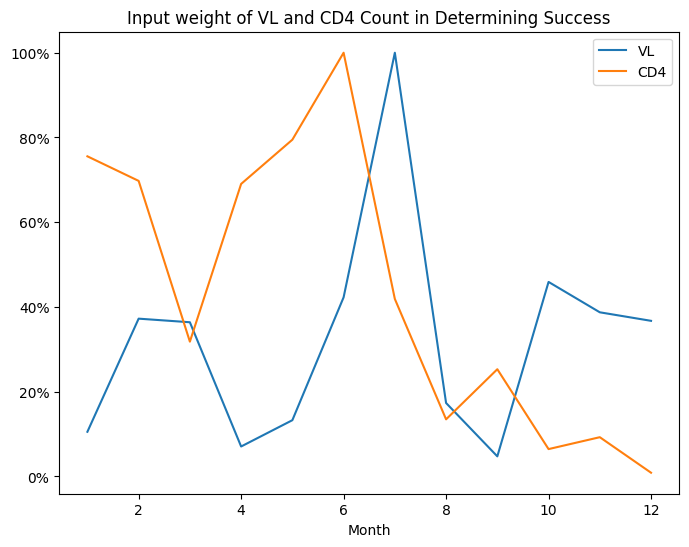

In [ ]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4,5,6,7,8,9,10,11,12], np.array(VL_weight)/max(VL_weight) * 100, label = 'VL')
ax.plot([1,2,3,4,5,6,7,8,9,10,11,12], np.array(CD4_weight)/max(CD4_weight) * 100, label = 'CD4')

fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
plt.xlabel('Month')

plt.legend()
plt.title('Input weight of VL and CD4 Count in Determining Success')